# Chapter 6, Intro to Machine Learning

Ebook, A Hands-On Guide to Biomechanics Data Analysis with Python and AI  
Author, Dr. Hossein Mokhtarzadeh  
Powered by PoseIQ

Goal, show a minimal but complete example of training and evaluating a model on biomechanics features.  
Click Runtime, Run all.


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](YOUR_GITHUB_COLAB_URL_HERE)


## Install packages

In [1]:
!pip -q install scikit-learn pandas numpy matplotlib

## Prepare a feature table

In [2]:
import pandas as pd
import numpy as np

# If you already exported features in Chapter 5, you can load them here instead of using synthetic data.
# Example expected columns: peak_force, stride_time, symmetry_index, label
# Try uncommenting the line below if you have your own CSV.
# df = pd.read_csv("report_outputs/your_features.csv")

# Synthetic biomechanics-like feature set for classification and regression
rng = np.random.default_rng(42)
n = 200

# Simulate features with simple patterns
peak_force = rng.normal(1100, 120, n)           # N
stride_time = rng.normal(1.05, 0.12, n)         # s
symmetry_index = rng.normal(0.96, 0.05, n)      # unitless proxy around 1.0
age = rng.integers(18, 70, n)                   # years

# Binary label: injured vs healthy, depends loosely on stride_time and symmetry_index
injury_score = 0.7*(stride_time - 1.05) - 1.2*(symmetry_index - 0.96) + rng.normal(0, 0.15, n)
label = np.where(injury_score > 0.0, "injured", "healthy")

# Regression target, example predict 10 m sprint time from features
sprint_time = 2.0 + 0.001*(1200 - peak_force) + 0.6*(stride_time - 1.0) + 0.4*(1.0 - symmetry_index) + 0.003*(age - 30) + rng.normal(0, 0.05, n)

df = pd.DataFrame({
    "peak_force": peak_force,
    "stride_time": stride_time,
    "symmetry_index": symmetry_index,
    "age": age,
    "label": label,
    "sprint_time": sprint_time
})
df.head()


,peak_force,stride_time,symmetry_index,age,label,sprint_time
0,1136.566050,1.090509,0.951019,30,healthy,2.189799
1,975.201907,1.218898,0.969839,39,healthy,2.361400
2,1190.054143,1.060870,1.001026,21,healthy,1.975942
3,1212.867766,1.127273,0.940313,59,healthy,2.198314
4,865.875777,0.803979,0.986058,51,healthy,2.208306


## Train a classifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

features_cls = ["peak_force", "stride_time", "symmetry_index", "age"]
X = df[features_cls]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix,")
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

     healthy       0.68      0.58      0.62        26
     injured       0.61      0.71      0.65        24

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.65      0.64      0.64        50

Confusion matrix,
[[15 11]
 [ 7 17]]


## Plot feature importance

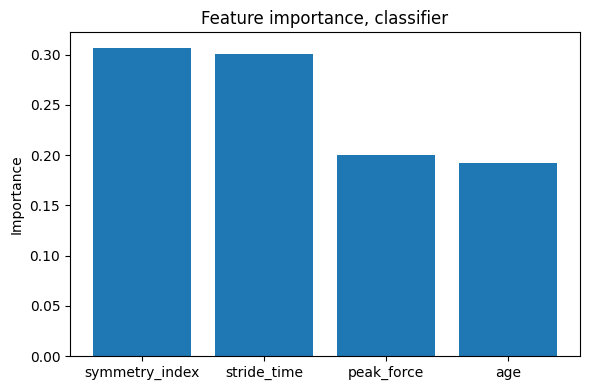

In [4]:
import matplotlib.pyplot as plt
import numpy as np

imp = clf.feature_importances_
order = np.argsort(imp)[::-1]

plt.figure(figsize=(6,4))
plt.bar(range(len(order)), imp[order])
plt.xticks(range(len(order)), np.array(features_cls)[order], rotation=0)
plt.ylabel("Importance")
plt.title("Feature importance, classifier")
plt.tight_layout()
plt.show()


## Train a regressor

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

features_reg = ["peak_force", "stride_time", "symmetry_index", "age"]
Xr = df[features_reg]
yr = df["sprint_time"]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.25, random_state=42)

regr = RandomForestRegressor(n_estimators=300, random_state=42)
regr.fit(Xr_train, yr_train)
yr_pred = regr.predict(Xr_test)

print("R2:", r2_score(yr_test, yr_pred))
print("MAE:", mean_absolute_error(yr_test, yr_pred))
print("RMSE:", np.sqrt(mean_squared_error(yr_test, yr_pred)))

R2: 0.7271439152790266
MAE: 0.050394864777767986
RMSE: 0.06350812559554876


## Plot predicted vs true for regression

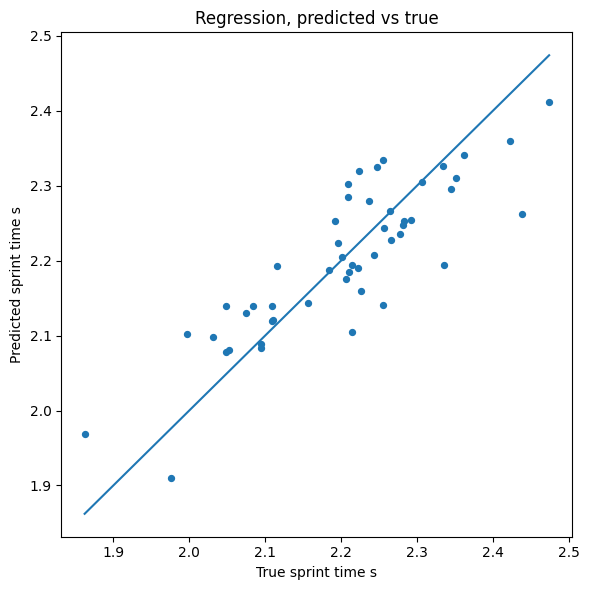

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(yr_test, yr_pred, s=18)
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()])
plt.xlabel("True sprint time s")
plt.ylabel("Predicted sprint time s")
plt.title("Regression, predicted vs true")
plt.tight_layout()
plt.show()


## Save a compact report

In [8]:
import os, json
os.makedirs("ml_outputs", exist_ok=True)

# Save models and minimal metadata
import joblib
joblib.dump(clf, "ml_outputs/classifier.joblib")
joblib.dump(regr, "ml_outputs/regressor.joblib")
df.to_csv("ml_outputs/features_table.csv", index=False)

report = {
    "n_samples": int(len(df)),
    "features_cls": features_cls,
    "features_reg": features_reg
}
with open("ml_outputs/README.json", "w") as f:
    json.dump(report, f, indent=2)

print("Saved to ml_outputs/, models and features_table.csv")


Saved to ml_outputs/, models and features_table.csv


## Summary

You trained a simple classifier and regressor on biomechanics style features, plotted results, and saved outputs.  
In a future book we will replace synthetic data with real features from Chapters 2 to 5 and cover validation, pipelines, and deep learning for time series.
